In [229]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

nov24_raw = pd.read_excel('./Voter Registration Data/county_nov24.xlsx')

all_data = {}

for file in glob.glob('./Voter Registration Data/*'):
    data = pd.read_excel(file)
    date = data.iloc[0,0][-4:]
    all_data[date] = data

In [230]:
def clean(raw_array):
    raw_array = raw_array.dropna()
    raw_array.columns = raw_array.loc[3]
    raw_array = raw_array.drop(3)
    raw_array.reset_index(drop=True, inplace=True)
    raw_array.columns.name = None

    int_cols = raw_array.columns[3:]
    str_cols = raw_array.columns[:3]

    for col in int_cols:
        raw_array[col] = raw_array[col].astype('int64')

    for col in str_cols:
        raw_array[col] = raw_array[col].str.strip()

    return raw_array

In [274]:
clean_data = {}

for date in all_data:
    clean_data[date] = clean(all_data[date])

# Use all_data.keys() for list of years
clean_data['2021']

,REGION,COUNTY,STATUS,DEM,REP,CON,WOR,OTH,BLANK,TOTAL
0,Outside NYC,Albany,Active,99177,35211,3406,869,8619,48493,195775
1,Outside NYC,Albany,Inactive,7724,2604,234,83,941,4224,15810
2,Outside NYC,Albany,Total,106901,37815,3640,952,9560,52717,211585
3,Outside NYC,Allegany,Active,5623,13349,469,130,1291,5481,26343
4,Outside NYC,Allegany,Inactive,232,389,19,5,76,278,999
...,...,...,...,...,...,...,...,...,...,...
181,Within NYC,Queens,Inactive,69485,12275,536,378,3340,24028,110042
182,Within NYC,Queens,Total,874424,150039,5955,3910,31067,304480,1369875
183,Within NYC,Richmond,Active,131246,99198,4388,1056,10055,72379,318322
184,Within NYC,Richmond,Inactive,14068,9401,514,151,1295,6935,32364


C:\Users\tgran\AppData\Local\Temp\ipykernel_15760\1748202130.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_perc = all_totals.transpose().tail(-2).pct_change() * 100


<Axes: >

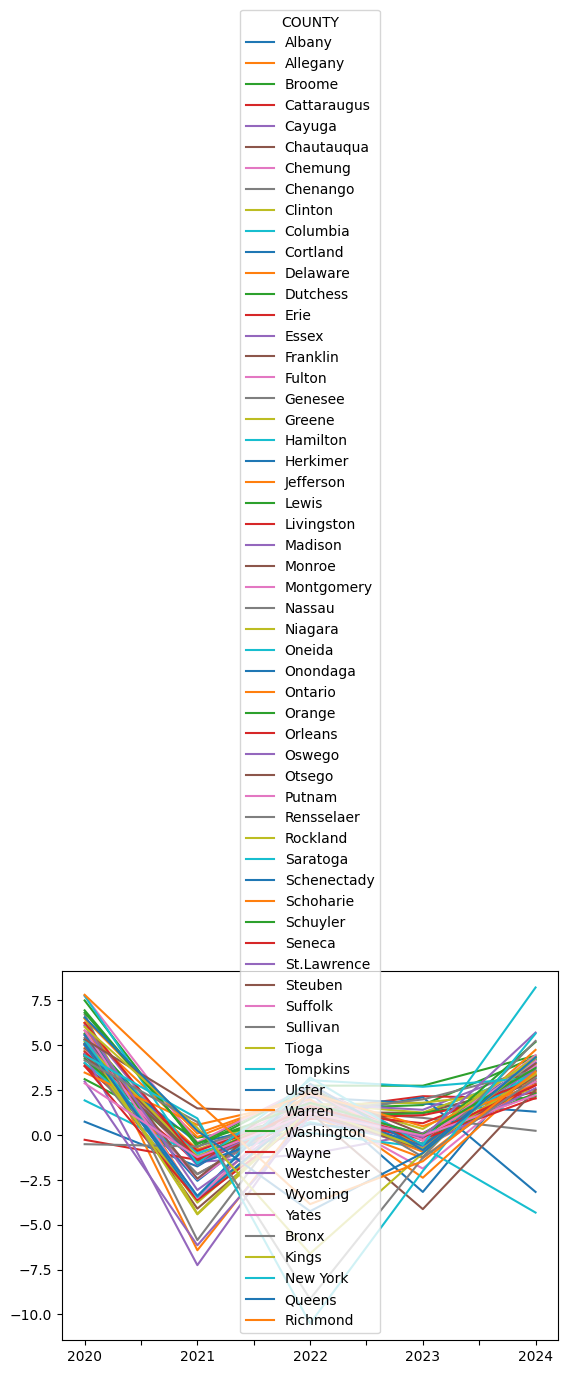

In [278]:
# initalize the REGION column for all_totals
all_totals = clean_data['2019'].loc[clean_data['2019']['STATUS'].str.contains('Total'), ['REGION']]
all_totals['COUNTY'] = clean_data['2019'].loc[clean_data['2019']['STATUS'].str.contains('Total'), ['COUNTY']]

for date in clean_data:
    month_data = clean_data[date]
    all_totals[date] = month_data.loc[month_data['STATUS'].str.contains('Total'), ['TOTAL']]

all_totals.reset_index(drop=True, inplace=True)

all_perc = all_totals.transpose().tail(-2).pct_change() * 100

all_perc.round(2)
all_perc.columns = all_totals['COUNTY']

# all_perc.iloc[:,-5:].plot()

all_perc.plot()

# Graph the mid quartiles, median line, and any outliers

In [235]:
# plt.plot(all_totals.COUNTY, all_totals['2019'])

# plt.show()